In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statistics import *
from math import pi
import os
from pathlib import Path
import matplotlib.patheffects as path_effects
import matplotlib
from matplotlib.patches import Rectangle
from PIL import Image

import warnings
warnings.filterwarnings("ignore")


lg = 'Serie A'
season = '23-24'
team = 'Frosinone'
develop = 24
prime = 30
sig = '@BeGriffis'
data_time = 'Data as of Nov 23'


In [2]:
df = pd.read_csv(r"C:\Users\Ben\From Mac\Python\FBRef\FBRef files\Wyscout Data\%s %s.csv" %(lg,season))
mlg = df['Competition'].mode().values[0]
df['Team within selected timeframe'] = [df['Team'][i] if (df['Team within selected timeframe'][i]=='' or df['Competition'][i]!=mlg) else df['Team within selected timeframe'][i] for i in range(len(df))]
df.dropna(subset=['Age'],inplace=True)
df['Primary position'] = df['Primary position'].replace(['LB','LB5','LWB'], 'LB')
df['Primary position'] = df['Primary position'].replace(['RB','RB5','RWB'], 'RB')
df['Primary position'] = df['Primary position'].replace(['LCB3'], 'LCB')
df['Primary position'] = df['Primary position'].replace(['RCB3'], 'RCB')
df['Primary position'] = df['Primary position'].replace(['LCMF','RCMF','LCMF3','RCMF3','CMF'], 'CM')
df['Primary position'] = df['Primary position'].replace(['CF'], 'ST')
df['Primary position'] = df['Primary position'].replace(['RDMF','LDMF','DMF'], 'DM')
df['Primary position'] = df['Primary position'].replace(['LAMF','LW','LWF'], 'LW')
df['Primary position'] = df['Primary position'].replace(['RAMF','RW','RWF'], 'RW')
df['Primary position'] = df['Primary position'].replace(['AMF'], 'CAM')

df['Team within selected timeframe'].sort_values().unique()

array(['Atalanta', 'Bologna', 'Cagliari', 'Empoli', 'Fiorentina',
       'Frosinone', 'Genoa', 'Hellas Verona', 'Internazionale',
       'Juventus', 'Lazio', 'Lecce', 'Milan', 'Monza', 'Napoli', 'Roma',
       'Salernitana', 'Sassuolo', 'Torino', 'Udinese'], dtype=object)

In [3]:
from datetime import date

def calculate_age(born):
    today = date.today()
    delta = today - born
    return delta.days/365.25

df.Age = [calculate_age(date.fromisoformat(df['Birthday'].iloc[i])) for i in range(len(df))]


In [4]:
p = df.groupby(['Player','Team within selected timeframe','Primary position']).agg({'Minutes played':'mean','Age':'mean'}).reset_index()
t = df.groupby(['Team within selected timeframe']).agg({'Minutes played':'sum'}).reset_index()
t['Minutes played'] = t['Minutes played']/11.1

i=0
p['% Available Minutes Played'] = [p['Minutes played'].iloc[i] / t[t['Team within selected timeframe']==p['Team within selected timeframe'].iloc[i]]['Minutes played'].values[0] for i in range(len(p))]
p['% Available Minutes Played'] = [100 if p['% Available Minutes Played'].iloc[i] > 1 else p['% Available Minutes Played'].iloc[i]*100 for i in range(len(p))]
p = p.sort_values(by=['% Available Minutes Played'],ascending=False).reset_index(drop=True)
p.rename(columns={'Team within selected timeframe':'Team','Primary position':'Position'},inplace=True)
p.dropna(subset=['Age'],inplace=True)
p.reset_index(drop=True,inplace=True)
p

,Player,Team,Position,Minutes played,Age,% Available Minutes Played
0,Ł. Skorupski,Bologna,GK,1195.0,32.555784,100.000000
1,R. Drăgușin,Genoa,LCB,1198.0,21.804244,100.000000
2,M. Silvestri,Udinese,GK,1188.0,32.731006,100.000000
3,J. Bijol,Udinese,CB,1188.0,24.799452,100.000000
4,M. Pongračić,Lecce,RCB,1200.0,26.201232,100.000000
...,...,...,...,...,...,...
483,S. Verdi,Torino,CAM,10.0,31.367556,0.840336
484,M. Coulibaly,Salernitana,CM,9.0,24.731006,0.761375
485,A. Vogliacco,Genoa,RCB,9.0,25.193703,0.761259
486,H. Nicolussi,Juventus,CM,8.0,23.433265,0.678692


(-0.5, 329.5, 374.5, -0.5)

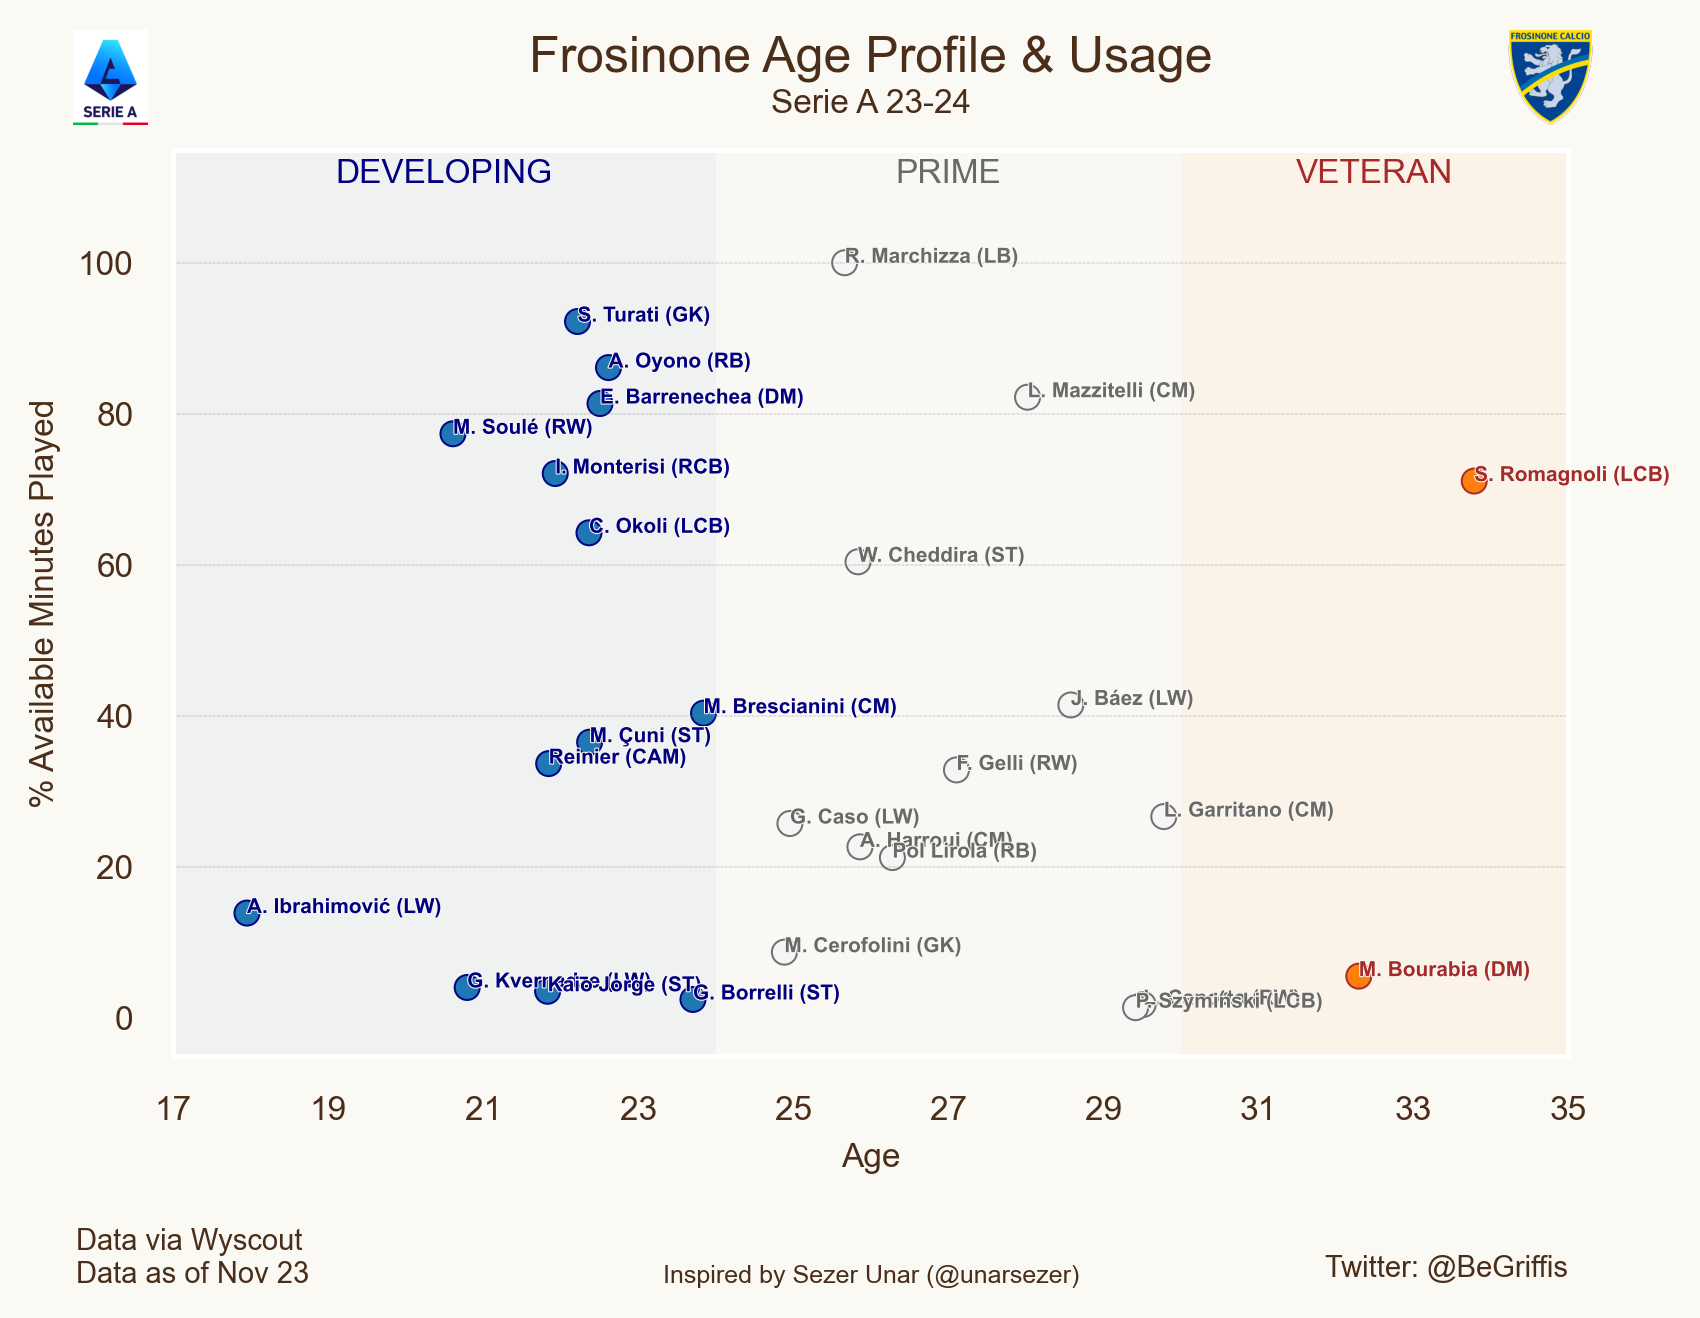

In [10]:
sns.set_theme(style="white")
sns.set(rc={'axes.facecolor':'#fbf9f4', 'figure.facecolor':'#fbf9f4',
           'axes.grid': False, 'axes.labelsize':8, 'axes.labelcolor':'#4A2E19',
           'ytick.labelsize':8, 'xtick.labelsize':8,
           'ytick.labelcolor':'#4A2E19', 'xtick.labelcolor':'#4A2E19'})
matplotlib.rcParams['figure.dpi'] = 300

#####
df = p[p['Team']==team].reset_index(drop=True)
xx = 'Age'
yy = '% Available Minutes Played'
#####
# df.Age = df.Age.astype(int)
df['Ages'] = ''
for i in range(len(df)):
    if df['Age'][i] <= develop:
        df['Ages'][i] = 'Developing'
    if develop < df['Age'][i] < prime:
        df['Ages'][i] = 'Prime'
    if df['Age'][i] >= prime:
        df['Ages'][i] = 'Veteran'


colors_ = {'Prime':'whitesmoke', 'Veteran':'tab:orange', 'Developing':'tab:blue'}
ec_ = {'Prime':'dimgrey', 'Veteran':'brown', 'Developing':'navy'}


g = sns.scatterplot(data=df, x=xx, y=yy,
                c=df['Ages'].map(colors_), ec = df['Ages'].map(ec_),
               )

path_eff = [path_effects.Stroke(linewidth=.5, foreground='#fbf9f4'),
            path_effects.Normal()]
for i in range(len(df)):
    if df['Ages'][i] == 'Prime':
        cc = 'dimgrey'
    if df['Ages'][i] == 'Developing':
        cc = 'navy'
    if df['Ages'][i] == 'Veteran':
        cc = 'brown'
    plt.annotate(f"{df['Player'][i]} ({df['Position'][i]})",
                 (df[xx][i], df[yy][i]), size=5, color=cc,
                 fontweight='bold', zorder=4, path_effects=path_eff)

g.set_ylim([-5,115])
minx, maxx, miny, maxy = g.get_xlim()[0], g.get_xlim()[1], g.get_ylim()[0], g.get_ylim()[1]
plt.xticks(range(int(round(minx,0)),int(round(maxx,0))+1,2))
minx, maxx, miny, maxy = g.get_xlim()[0], g.get_xlim()[1], g.get_ylim()[0], g.get_ylim()[1]

g.add_patch(Rectangle((prime, miny), maxx,maxy+10, fc='tab:orange', alpha=.05))
g.add_patch(Rectangle((minx, miny), develop-minx,maxy+10, fc='tab:blue', alpha=.05))
g.add_patch(Rectangle((develop, miny), prime-develop,maxy+10, fc='whitesmoke', alpha=.05))

plt.axhline(y=100, lw=.1, ls='-.', color='grey')
plt.axhline(y=80, lw=.1, ls='-.', color='grey')
plt.axhline(y=60, lw=.1, ls='-.', color='grey')
plt.axhline(y=40, lw=.1, ls='-.', color='grey')
plt.axhline(y=20, lw=.1, ls='-.', color='grey')



g.text(minx+(develop-minx)/2, maxy-(maxy*.01),
      'DEVELOPING',
      ha='center', va='top', size=8, color='navy')

g.text(prime-((prime-develop)/2), maxy-(maxy*.01),
      'PRIME',
      ha='center', va='top', size=8, color='dimgrey')

g.text(prime+(maxx-prime)/2, maxy-(maxy*.01),
      'VETERAN',
      ha='center', va='top', size=8, color='brown')


g.text(minx+(maxx-minx)/2, maxy+(maxy-miny)/10,
      f'{team} Age Profile & Usage',
      ha='center', va='center', size=12, color='#4a2e19')
g.text(minx+(maxx-minx)/2, maxy+(maxy-miny)/20,
      f'{lg} {season}',
      ha='center', va='center', size=8, color='#4a2e19')

g.text(minx-((maxx-minx)*.07),miny-(maxy-miny)/4,'Data via Wyscout\n%s' %data_time,
      fontsize=7, color='#4a2e19', ha='left')

g.text(maxx,miny-(maxy-miny)/4,'Twitter: %s' %sig,
      fontsize=7, color='#4a2e19', ha='right', va='bottom')

g.text(minx+(maxx-minx)/2,miny-(maxy-miny)/4,'Inspired by Sezer Unar (@unarsezer)',
      fontsize=6, color='#4a2e19', ha='center')

fig = plt.gcf()
image = Image.open(r'C:\Users\Ben\From Mac\Python\FBRef\FBRef Files\Images\%s\%s Logo.png' %(lg,lg))
newax = fig.add_axes([0.05,.9,0.08,0.08], anchor='C', zorder=1)                   
newax.imshow(image)
newax.axis('off')

fig = plt.gcf()
image = Image.open(r'C:\Users\Ben\From Mac\Python\FBRef\FBRef Files\Images\%s\%s.png' %(lg,team))
newax = fig.add_axes([0.85,.9,0.08,0.08], anchor='C', zorder=1)                   
newax.imshow(image)
newax.axis('off')



In [6]:
df

,Player,Team,Position,Minutes played,Age,% Available Minutes Played,Ages
0,R. Marchizza,Frosinone,LB,1208.0,25.664613,100.000000,Prime
1,S. Turati,Frosinone,GK,1104.0,22.217659,92.214614,Developing
2,A. Oyono,Frosinone,RB,1031.0,22.617385,86.117089,Developing
3,L. Mazzitelli,Frosinone,CM,984.0,28.024641,82.191286,Prime
4,E. Barrenechea,Frosinone,DM,974.0,22.507871,81.356009,Developing
5,M. Soulé,Frosinone,RW,926.0,20.610541,77.346678,Developing
6,I. Monterisi,Frosinone,RCB,863.0,21.930185,72.084431,Developing
7,S. Romagnoli,Frosinone,LCB,851.0,33.787817,71.082098,Veteran
8,C. Okoli,Frosinone,LCB,769.0,22.365503,64.232824,Developing
9,W. Cheddira,Frosinone,ST,723.0,25.837098,60.390549,Prime


In [7]:
maxx-minx

18.0

In [8]:
df

,Player,Team,Position,Minutes played,Age,% Available Minutes Played,Ages
0,R. Marchizza,Frosinone,LB,1208.0,25.664613,100.000000,Prime
1,S. Turati,Frosinone,GK,1104.0,22.217659,92.214614,Developing
2,A. Oyono,Frosinone,RB,1031.0,22.617385,86.117089,Developing
3,L. Mazzitelli,Frosinone,CM,984.0,28.024641,82.191286,Prime
4,E. Barrenechea,Frosinone,DM,974.0,22.507871,81.356009,Developing
5,M. Soulé,Frosinone,RW,926.0,20.610541,77.346678,Developing
6,I. Monterisi,Frosinone,RCB,863.0,21.930185,72.084431,Developing
7,S. Romagnoli,Frosinone,LCB,851.0,33.787817,71.082098,Veteran
8,C. Okoli,Frosinone,LCB,769.0,22.365503,64.232824,Developing
9,W. Cheddira,Frosinone,ST,723.0,25.837098,60.390549,Prime
